# Setup

In [1]:
# 可以省略一些警报提示
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare

In [2]:
train_data = pd.read_csv("data/used_car_train_20200313.csv",sep=' ')
test_data = pd.read_csv("data/used_car_testA_20200313.csv",sep=' ')
car = train_data.copy()
car_test = test_data.copy()
car["notRepairedDamage"].replace(to_replace='-',value=np.nan,inplace=True)
car_test["notRepairedDamage"].replace(to_replace='-',value=np.nan,inplace=True)
# 给定数值属性和分类属性名称的列表
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]
categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode',]

# Code

### 分割csv源文件

In [3]:
train_data = pd.read_csv("Data/used_car_train_20200313.csv")
train_data.head(3)

,SaleID name regDate model brand bodyType fuelType gearbox power kilometer notRepairedDamage regionCode seller offerType creatDate price v_0 v_1 v_2 v_3 v_4 v_5 v_6 v_7 v_8 v_9 v_10 v_11 v_12 v_13 v_14
0,0 736 20040402 30.0 6 1.0 0.0 0.0 60 12.5 0.0 ...
1,1 2262 20030301 40.0 1 2.0 0.0 0.0 0 15.0 - 43...
2,2 14874 20040403 115.0 15 1.0 0.0 0.0 163 12.5...


In [4]:
train_data = pd.read_csv("Data/used_car_train_20200313.csv",sep=' ')
train_data.head(3)

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963


---
### 用`np.nan`代替一些不正规的空值

In [24]:
# 例如notRepairedDamage这一列，表面上没有缺失，但是用了某种符号代替了缺失。这种情况需要我们手动修改成np.nan
car["notRepairedDamage"].value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [26]:
car["notRepairedDamage"].replace(to_replace='-',value=np.nan,inplace=True)
car["notRepairedDamage"].value_counts()

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

---
### `Series`排序

In [9]:
# 对特征的缺失情况进行排序
miss_data = car.isnull().sum()
miss_data = miss_data[miss_data > 0]
miss_data

model          1
bodyType    4506
fuelType    8680
gearbox     5981
dtype: int64

In [11]:
# 降序排序并代替原Series
miss_data.sort_values(inplace=True, ascending=False)

In [12]:
miss_data

fuelType    8680
gearbox     5981
bodyType    4506
model          1
dtype: int64

---
### 查看各个特征值的占比和该属性下所有特征值的数量(去重复)

In [3]:
car['power'].value_counts()

0       12829
75       9593
150      6495
60       6374
140      5963
        ...  
1597        1
1596        1
572         1
316         1
575         1
Name: power, Length: 566, dtype: int64

In [5]:
car['power'].nunique()

566

---
### 绘制连续性特征值的统计密度

In [4]:
test = pd.melt(car,value_vars=numeric_features)# 效果是给出每个属性所有特征值的键值对

In [7]:
car.head(5)

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [5]:
# 缺点是计算量很大，数量大概是数据集*待查看特征的特征数
test

,variable,value
0,power,60.000000
1,power,0.000000
2,power,163.000000
3,power,193.000000
4,power,68.000000
...,...,...
2549995,v_14,-0.302592
2549996,v_14,-0.272160
2549997,v_14,0.414931
2549998,v_14,-1.659014


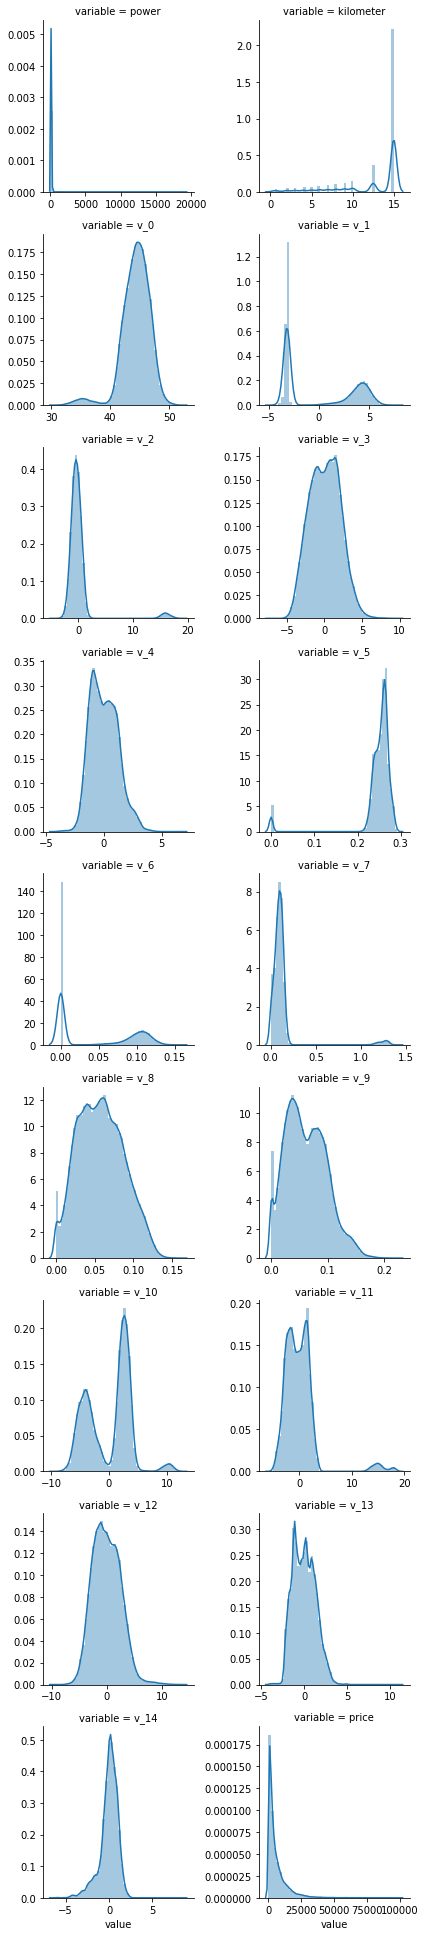

In [21]:
import seaborn as sns

# 对于数值属性，以下代码给出各个属性自己的密度统计
f = pd.melt(car, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

In [24]:
# 自动化读出数值，但是可视程度很低
for feature in numeric_features:
    print(car[feature].skew(), car[feature].kurt())
    print(car[feature].skew(), car[feature].kurt())

65.86317787049431 5733.451054383472
65.86317787049431 5733.451054383472
-1.5259213647093675 1.1419341878108615
-1.5259213647093675 1.1419341878108615
-1.3167123246147485 3.9938410489909333
-1.3167123246147485 3.9938410489909333
0.35945428717319244 -1.7530169963916526
0.35945428717319244 -1.7530169963916526
4.84255590370825 23.860591021372812
4.84255590370825 23.860591021372812
0.10629204046349174 -0.41800588767002234
0.10629204046349174 -0.41800588767002234
0.36798897024117394 -0.19729524319224812
0.36798897024117394 -0.19729524319224812
-4.737093909159257 22.934081062932353
-4.737093909159257 22.934081062932353
0.36807304206237046 -1.742566654344069
0.36807304206237046 -1.742566654344069
5.130233018546552 25.84548929389203
5.130233018546552 25.84548929389203
0.20461325701221503 -0.6362252575610374
0.20461325701221503 -0.6362252575610374
0.4195007497445114 -0.3214911788984405
0.4195007497445114 -0.3214911788984405
0.02522046412408469 -0.5779350635359988
0.02522046412408469 -0.577935063

In [38]:
# 另一种方法是采用字典的形式
for feature in numeric_features:
#     print('{:.2f}'.format(car[feature].skew())) # 保留小数位输出
      print('{:10}'.format(feature), 'skew:{:10.2f}'.format(car[feature].skew()), '  ','kurt:{:.2f}'.format(car[feature].kurt())) # 空行输出

power      skew:     65.86    kurt:5733.45
kilometer  skew:     -1.53    kurt:1.14
v_0        skew:     -1.32    kurt:3.99
v_1        skew:      0.36    kurt:-1.75
v_2        skew:      4.84    kurt:23.86
v_3        skew:      0.11    kurt:-0.42
v_4        skew:      0.37    kurt:-0.20
v_5        skew:     -4.74    kurt:22.93
v_6        skew:      0.37    kurt:-1.74
v_7        skew:      5.13    kurt:25.85
v_8        skew:      0.20    kurt:-0.64
v_9        skew:      0.42    kurt:-0.32
v_10       skew:      0.03    kurt:-0.58
v_11       skew:      3.03    kurt:12.57
v_12       skew:      0.37    kurt:0.27
v_13       skew:      0.27    kurt:-0.44
v_14       skew:     -1.19    kurt:2.39


---
### 按列或者按行合并DF
按列合并

In [6]:
car_labels = car['price']

In [9]:
# 按列合并car['price']和car['v_12']
pd.concat([car_labels,car['v_12']],axis=1).head() # 注意外层[] 

,price,v_12
0,1850,-2.420821
1,3600,-1.030483
2,6222,1.565330
3,2400,-0.501868
4,5200,0.931110


按行合并

In [9]:
a = car.copy()
b = car_test.copy()
c = pd.concat([a,b],ignore_index=True)
c['price'] # a和b的列数不相同，但是可以正常合并，部分使用缺失值代替

0         1850.0
1         3600.0
2         6222.0
3         2400.0
4         5200.0
           ...  
199995       NaN
199996       NaN
199997       NaN
199998       NaN
199999       NaN
Name: price, Length: 200000, dtype: float64

---

### 相互回归关系：sns排版

<AxesSubplot:xlabel='v_12', ylabel='price'>

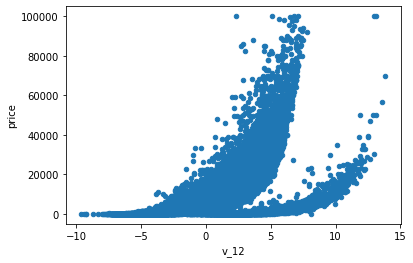

In [11]:
# 采用baseline的方式可能可以更好的控制排版。但是直接使用.plot也可以
car.plot(kind='scatter',x='v_12',y='price')

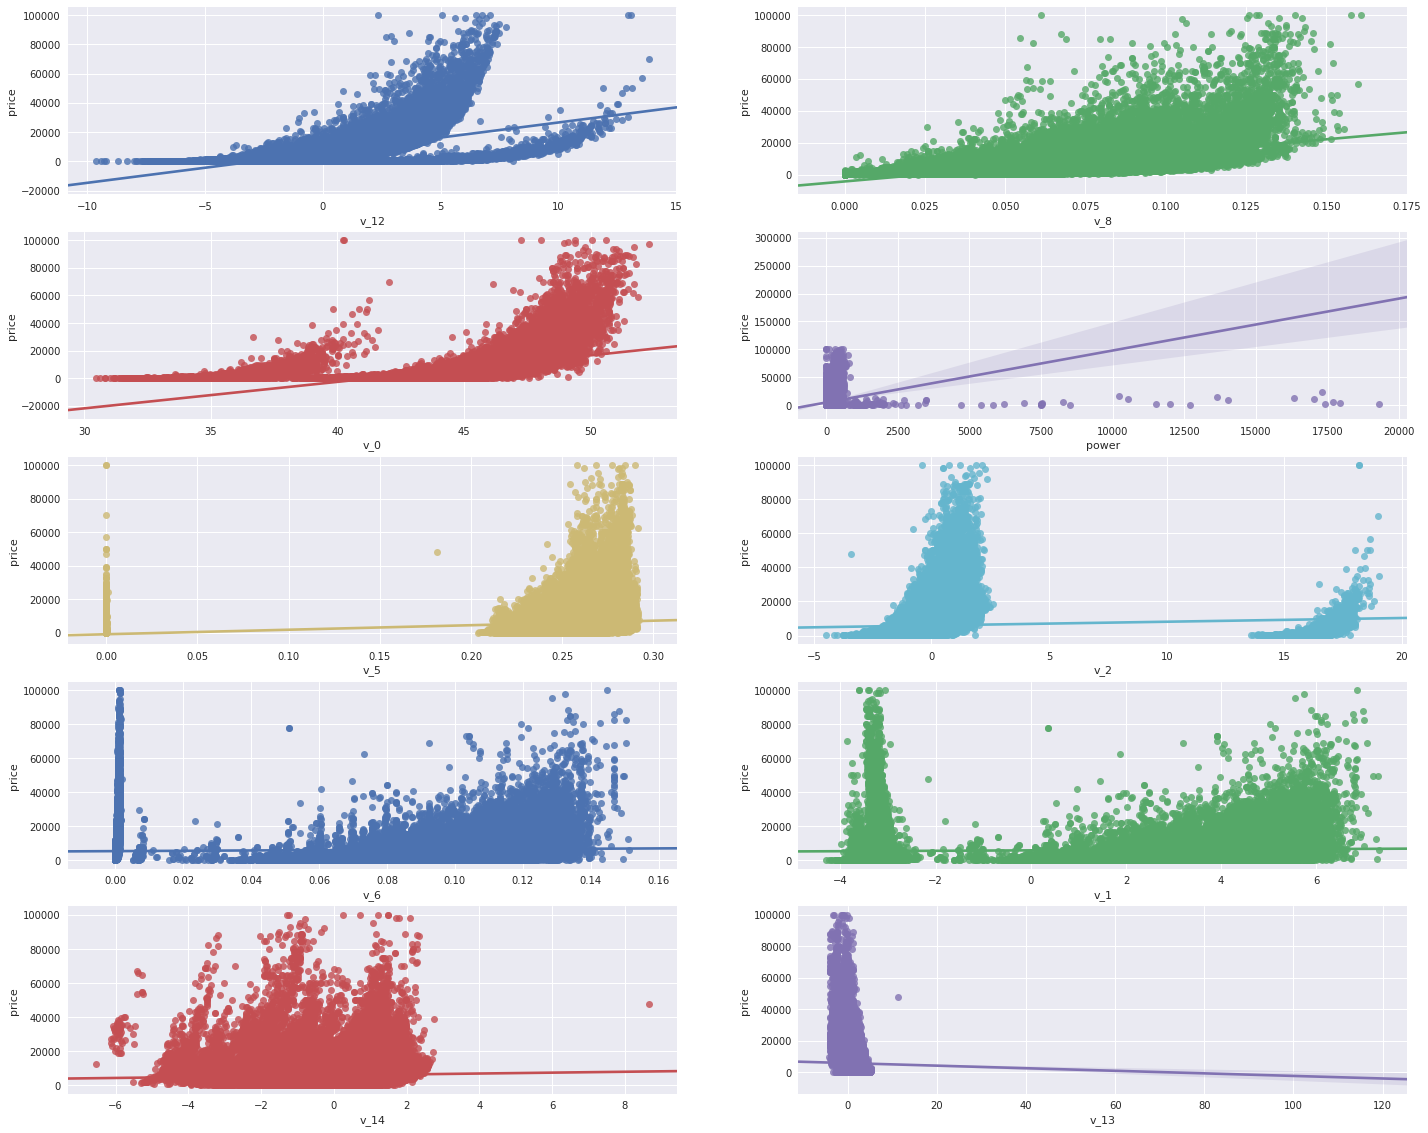

In [56]:
# Baseline的代码
# fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(24, 20))
# # ['v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
# v_12_scatter_plot = pd.concat([Y_train,Train_data['v_12']],axis = 1)
# sns.regplot(x='v_12',y = 'price', data = v_12_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

# v_8_scatter_plot = pd.concat([Y_train,Train_data['v_8']],axis = 1)
# sns.regplot(x='v_8',y = 'price',data = v_8_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

# v_0_scatter_plot = pd.concat([Y_train,Train_data['v_0']],axis = 1)
# sns.regplot(x='v_0',y = 'price',data = v_0_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

# power_scatter_plot = pd.concat([Y_train,Train_data['power']],axis = 1)
# sns.regplot(x='power',y = 'price',data = power_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

# v_5_scatter_plot = pd.concat([Y_train,Train_data['v_5']],axis = 1)
# sns.regplot(x='v_5',y = 'price',data = v_5_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

# v_2_scatter_plot = pd.concat([Y_train,Train_data['v_2']],axis = 1)
# sns.regplot(x='v_2',y = 'price',data = v_2_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

# v_6_scatter_plot = pd.concat([Y_train,Train_data['v_6']],axis = 1)
# sns.regplot(x='v_6',y = 'price',data = v_6_scatter_plot,scatter= True, fit_reg=True, ax=ax7)

# v_1_scatter_plot = pd.concat([Y_train,Train_data['v_1']],axis = 1)
# sns.regplot(x='v_1',y = 'price',data = v_1_scatter_plot,scatter= True, fit_reg=True, ax=ax8)

# v_14_scatter_plot = pd.concat([Y_train,Train_data['v_14']],axis = 1)
# sns.regplot(x='v_14',y = 'price',data = v_14_scatter_plot,scatter= True, fit_reg=True, ax=ax9)

# v_13_scatter_plot = pd.concat([Y_train,Train_data['v_13']],axis = 1)
# sns.regplot(x='v_13',y = 'price',data = v_13_scatter_plot,scatter= True, fit_reg=True, ax=ax10)


---
### 简单了解时间差的代码处理 

In [3]:
data = pd.concat([car,car_test], ignore_index=True)# 默认按行合并

In [4]:
# car_test中没有的属性全部用空值代替
data['price']

0         1850.0
1         3600.0
2         6222.0
3         2400.0
4         5200.0
           ...  
199995       NaN
199996       NaN
199997       NaN
199998       NaN
199999       NaN
Name: price, Length: 200000, dtype: float64

In [25]:
# 已知起始日期和末尾日期
data['creatDate']

0         20160404
1         20160309
2         20160402
3         20160312
4         20160313
            ...   
199995    20160320
199996    20160329
199997    20160305
199998    20160404
199999    20160322
Name: creatDate, Length: 200000, dtype: int64

In [31]:
# 一般构造时间序列差，需要先转换为时间序列，注意参数
pd.to_datetime(data['creatDate'],format='%Y%m%d%',errors='coerce') 

0        NaT
1        NaT
2        NaT
3        NaT
4        NaT
          ..
199995   NaT
199996   NaT
199997   NaT
199998   NaT
199999   NaT
Name: creatDate, Length: 200000, dtype: datetime64[ns]

In [32]:
pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') - pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')

0        4385 days
1        4757 days
2        4382 days
3        7125 days
4        1531 days
            ...   
199995   7261 days
199996   6014 days
199997   4345 days
199998         NaT
199999   4151 days
Length: 200000, dtype: timedelta64[ns]

In [40]:
(pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') - pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt

In [42]:
# 提取days
(pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') - pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).days

SyntaxError: invalid syntax (<ipython-input-42-fc3e549e64ab>, line 2)

In [43]:
(pd.to_datetime(data['creatDate'], format='%Y%m%d', errors='coerce') - pd.to_datetime(data['regDate'], format='%Y%m%d', errors='coerce')).dt.days

0         4385.0
1         4757.0
2         4382.0
3         7125.0
4         1531.0
           ...  
199995    7261.0
199996    6014.0
199997    4345.0
199998       NaN
199999    4151.0
Length: 200000, dtype: float64

---
### 计算分类的统计量(生成嵌套字典的细节)

In [3]:
info1 = {'brand_amount': 31480, 'brand_price_max': 68500, 'brand_price_median': 3199.0, 'brand_price_min': 13, 'brand_price_sum': 174253290, 'brand_price_std': 6272.522118575289, 'brand_price_average': 5535.19}
info2 = {'brand_amount': 13794, 'brand_price_max': 99900, 'brand_price_median': 6499.0, 'brand_price_min': 15, 'brand_price_sum': 127916065, 'brand_price_std': 9369.631497175225, 'brand_price_average': 9272.64}
all_info={}
all_info[1] = info1
all_info[2] = info2
all_info

{1: {'brand_amount': 31480,
  'brand_price_max': 68500,
  'brand_price_median': 3199.0,
  'brand_price_min': 13,
  'brand_price_sum': 174253290,
  'brand_price_std': 6272.522118575289,
  'brand_price_average': 5535.19},
 2: {'brand_amount': 13794,
  'brand_price_max': 99900,
  'brand_price_median': 6499.0,
  'brand_price_min': 15,
  'brand_price_sum': 127916065,
  'brand_price_std': 9369.631497175225,
  'brand_price_average': 9272.64}}

In [4]:
# 将DataFrame理解为一种嵌套字典的形式
pd.DataFrame(all_info)

,1,2
brand_amount,3.148000e+04,1.379400e+04
brand_price_max,6.850000e+04,9.990000e+04
brand_price_median,3.199000e+03,6.499000e+03
brand_price_min,1.300000e+01,1.500000e+01
brand_price_sum,1.742533e+08,1.279161e+08
brand_price_std,6.272522e+03,9.369631e+03
brand_price_average,5.535190e+03,9.272640e+03


In [5]:
# 单独查看一行或者一列都是以下形式
all_info

{1: {'brand_amount': 31480,
  'brand_price_max': 68500,
  'brand_price_median': 3199.0,
  'brand_price_min': 13,
  'brand_price_sum': 174253290,
  'brand_price_std': 6272.522118575289,
  'brand_price_average': 5535.19},
 2: {'brand_amount': 13794,
  'brand_price_max': 99900,
  'brand_price_median': 6499.0,
  'brand_price_min': 15,
  'brand_price_sum': 127916065,
  'brand_price_std': 9369.631497175225,
  'brand_price_average': 9272.64}}

In [47]:
# .T.reset_index()
# .rename(columns={"index": "brand"})
# 总体上，我们需要得到类似以下的形式：columns——统计量，rows——样本的分类
pd.DataFrame(all_info).T

,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average
1,31480.0,68500.0,3199.0,13.0,174253290.0,6272.522119,5535.19
2,13794.0,99900.0,6499.0,15.0,127916065.0,9369.631497,9272.64


In [48]:
# .T.reset_index()
# .rename(columns={"index": "brand"})
# 按分类的列合并
pd.DataFrame(all_info).T.reset_index()

,index,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average
0,1,31480.0,68500.0,3199.0,13.0,174253290.0,6272.522119,5535.19
1,2,13794.0,99900.0,6499.0,15.0,127916065.0,9369.631497,9272.64


In [49]:
# .T.reset_index()
# .rename(columns={"index": "brand"})
pd.DataFrame(all_info).T.reset_index().rename(columns={"index": "brand"})

,brand,brand_amount,brand_price_max,brand_price_median,brand_price_min,brand_price_sum,brand_price_std,brand_price_average
0,1,31480.0,68500.0,3199.0,13.0,174253290.0,6272.522119,5535.19
1,2,13794.0,99900.0,6499.0,15.0,127916065.0,9369.631497,9272.64
